In [1]:
from pylab import *
import bloch_am as bloch

In [2]:
# define parameters
cestFreq = linspace(-8,8,161)

B0_field = 7.

import pulse
pulseShape = 'bp' # specify 'bp', 'gaussian', 'fermi', 'sinc', or 'sg' for sinc-guassian

sat_pulse_amplitude = 3.6 # in micro Tesla
sat_pulse_duration = 4. # in seconds
post_pulse_delay = 0.000 # in seconds
crusher_gradient = True # define True or False

pulse_repeats = 1
satPulse = pulse.returnPulse(pulseShape, sat_pulse_duration, post_pulse_delay, pulseAmplitude=sat_pulse_amplitude)

In [3]:
# define pools
freewater = bloch.Pool('freewater', t1 = 3.6, t2 = 2.2, lifetime = 1., chemical_shift = -0.001, concentration = 111200)
hydroxyl_pDc = bloch.Pool('hydroxyl', t1 = 3.6, t2 = 1., lifetime = 1/2000.,  chemical_shift = 1.0, concentration = 20.)
imino_pDc = bloch.Pool('imino', t1 = 3.6, t2 = 0.2, lifetime = 1/900.,  chemical_shift = 5.8, concentration = 10.)
hydroxyl_5MDHT = bloch.Pool('hydroxyl', t1 = 3.6, t2 = 1., lifetime = 1/2000.,  chemical_shift = 1.0, concentration = 20.)
imino_5MDHT = bloch.Pool('imino', t1 = 3.6, t2 = 0.2, lifetime = 1/1700.,  chemical_shift = 5.0, concentration = 10.)
macromolecular = bloch.Pool('macromolecular', t1 = 3.6, t2 = 0.5, lifetime = 1/8.,  chemical_shift = -3., concentration = 0.1)

pools = (freewater, hydroxyl_pDc, imino_pDc, hydroxyl_5MDHT, imino_5MDHT, macromolecular)
pools_baseline = (freewater, macromolecular)

In [4]:
## define parameters
simulationMatrixCest= bloch.solve(pools, cestFreq, satPulse, crusher=False, magnetic_field=B0_field, pulse_repeat = 1, post_dynamic_delay=5)[2*len(pools),:,-1]
simulationMatrixCest_baseline= bloch.solve(pools_baseline, cestFreq, satPulse, crusher=False, magnetic_field=B0_field, pulse_repeat = 1, post_dynamic_delay=5)[2*len(pools_baseline),:,-1]

asym_test = pulse.asymAnalysis(simulationMatrixCest, cestFreq)

bloch_am.py:216: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  F, 0, pi/2, args=(pools[-1].t2, w, w_pools[-1]))[0]


In [5]:
B0_fields = np.array((3.0, 7.0, 9.4, 11.7, 15.1))

pools_pDc = (freewater, imino_pDc, macromolecular)
pools_5MDHT = (freewater, imino_5MDHT, macromolecular)

field_matrix = zeros((2, len(B0_fields), len(cestFreq)))
asym_array = zeros((2, len(B0_fields), int(len(cestFreq)/2)))

for ii in range(len(B0_fields)):
    field_matrix[0, ii] = bloch.solve(pools_pDc, cestFreq, satPulse, crusher=False, magnetic_field=B0_fields[ii], pulse_repeat = 1, post_dynamic_delay=5)[2*len(pools_pDc),:,-1]
    asym_array[0, ii] = pulse.asymAnalysis(field_matrix[0, ii], cestFreq)[1]
    field_matrix[1, ii] = bloch.solve(pools_5MDHT, cestFreq, satPulse, crusher=False, magnetic_field=B0_fields[ii], pulse_repeat = 1, post_dynamic_delay=5)[2*len(pools_5MDHT),:,-1]
    asym_array[1, ii] = pulse.asymAnalysis(field_matrix[1, ii], cestFreq)[1]

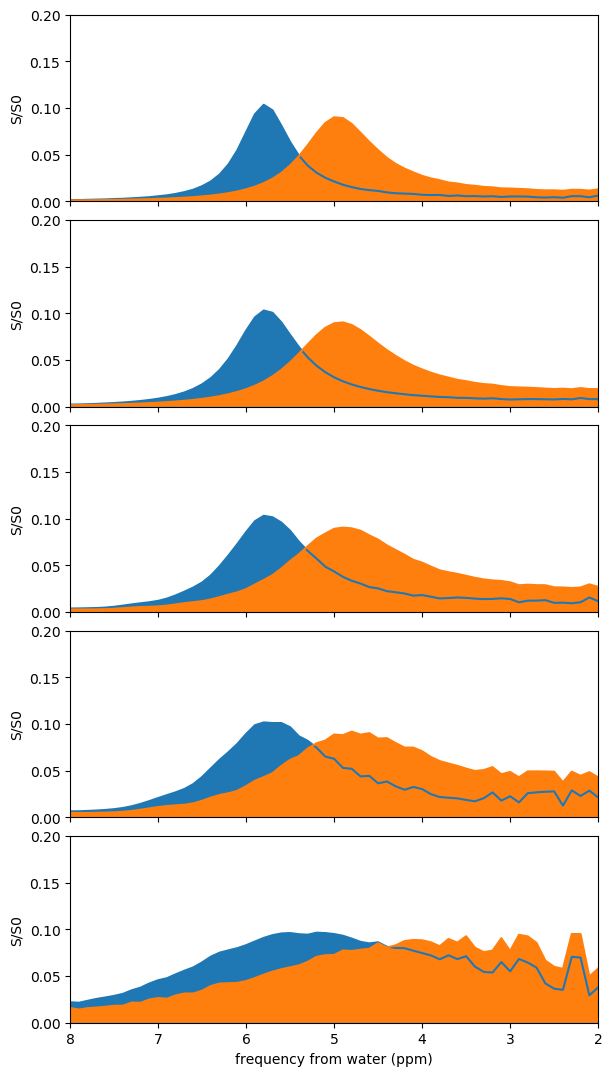

In [6]:
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('12')

figure(11, figsize=(6, 12), dpi=100)
clf()
gs1 = gridspec.GridSpec(5, 1)
gs1.update(left=0.1, right=0.98, bottom = 0.08, top = 0.92, wspace=0.1, hspace = 0.1)

for ii in range(5):
    axNum = subplot(gs1[4-ii%5, 0])
    for ij in range(2):
        axNum.plot(cestFreq[asym_test[0]],asym_array[ij,ii], '-')
        axNum.fill_between(cestFreq[asym_test[0]],asym_array[ij,ii])
#     axNum.annotate('%s'%tube_labels[ii], xy=(2, 1), xytext=(-2, 0.5))
    xlim(8., 2)
    ylim(0.0, 0.2)
    ylabel('S/S0')
    if ii==0:
        xlabel('frequency from water (ppm)')
    else:
        setp(axNum.get_xticklabels(), visible=False)